# Consumer Price Index

Dataset location :
This dataset available at

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
import warnings
from statsmodels.tools.eval_measures import rmse
from fbprophet.plot import add_changepoints_to_plot

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('CPIAUCSL.csv')
data.head()

,DATE,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [5]:
data.columns=['ds','y']
data['ds']=pd.to_datetime(data['ds'])
data.tail()

,ds,y
863,2018-12-01,252.723
864,2019-01-01,252.673
865,2019-02-01,253.113
866,2019-03-01,254.148
867,2019-04-01,254.958


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 2 columns):
ds    868 non-null datetime64[ns]
y     868 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.6 KB


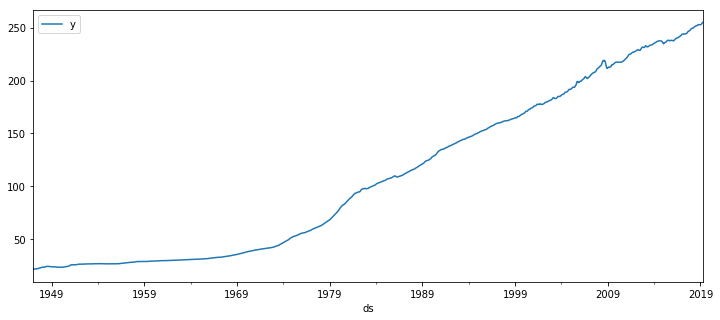

In [7]:
data.plot(x='ds',y='y',figsize=(12,5))

In [8]:
train=data.iloc[:820]
test=data.iloc[820:]

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 820 to 867
Data columns (total 2 columns):
ds    48 non-null datetime64[ns]
y     48 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 852.0 bytes


In [10]:
fbpro=Prophet()
fbpro.fit(train)
future=fbpro.make_future_dataframe(48,freq='MS')
forecast=fbpro.predict(future)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1947-01-01,22.387884,20.866473,23.883076,22.387884,22.387884,-0.120755,-0.120755,-0.120755,-0.120755,-0.120755,-0.120755,0.0,0.0,0.0,22.267129
1,1947-02-01,22.449490,20.847954,23.850634,22.449490,22.449490,-0.081634,-0.081634,-0.081634,-0.081634,-0.081634,-0.081634,0.0,0.0,0.0,22.367856
2,1947-03-01,22.505135,20.604671,23.720720,22.505135,22.505135,-0.307074,-0.307074,-0.307074,-0.307074,-0.307074,-0.307074,0.0,0.0,0.0,22.198060
3,1947-04-01,22.566741,20.823589,23.735006,22.566741,22.566741,-0.235705,-0.235705,-0.235705,-0.235705,-0.235705,-0.235705,0.0,0.0,0.0,22.331036
4,1947-05-01,22.626359,21.279276,24.180817,22.626359,22.626359,0.045742,0.045742,0.045742,0.045742,0.045742,0.045742,0.0,0.0,0.0,22.672101
5,1947-06-01,22.687965,21.300066,24.345364,22.687965,22.687965,0.036263,0.036263,0.036263,0.036263,0.036263,0.036263,0.0,0.0,0.0,22.724229
6,1947-07-01,22.747584,21.364350,24.400634,22.747584,22.747584,0.063548,0.063548,0.063548,0.063548,0.063548,0.063548,0.0,0.0,0.0,22.811132
7,1947-08-01,22.809190,21.335211,24.390428,22.809190,22.809190,0.049322,0.049322,0.049322,0.049322,0.049322,0.049322,0.0,0.0,0.0,22.858512
8,1947-09-01,22.870796,21.427174,24.538132,22.870796,22.870796,0.019640,0.019640,0.019640,0.019640,0.019640,0.019640,0.0,0.0,0.0,22.890436
9,1947-10-01,22.930415,21.371056,24.352792,22.930415,22.930415,-0.095389,-0.095389,-0.095389,-0.095389,-0.095389,-0.095389,0.0,0.0,0.0,22.835026


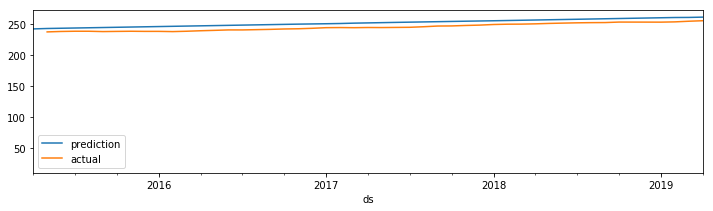

In [12]:
ax=forecast.plot(x='ds',y='yhat',figsize=(12,3),label='prediction',legend=True)
test.plot(x='ds',y='y',label='actual',legend=True,ax=ax,xlim=('2015-04-01','2019-04-01'))

In [13]:
testpred=forecast.iloc[-48:]['yhat']
rmse(testpred,test['y'])

6.876652011932644

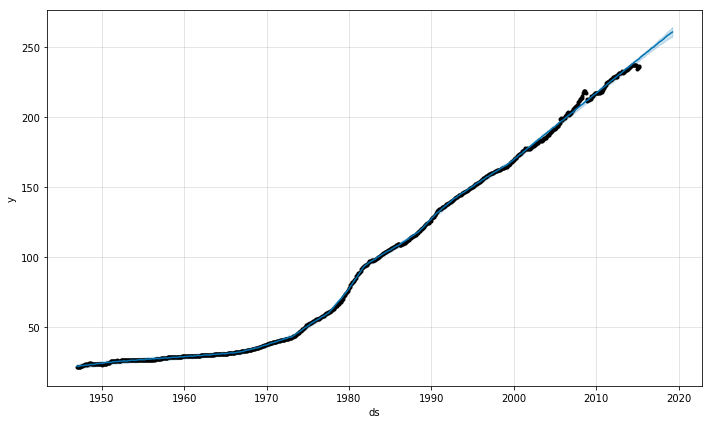

In [14]:
fig=fbpro.plot(forecast)

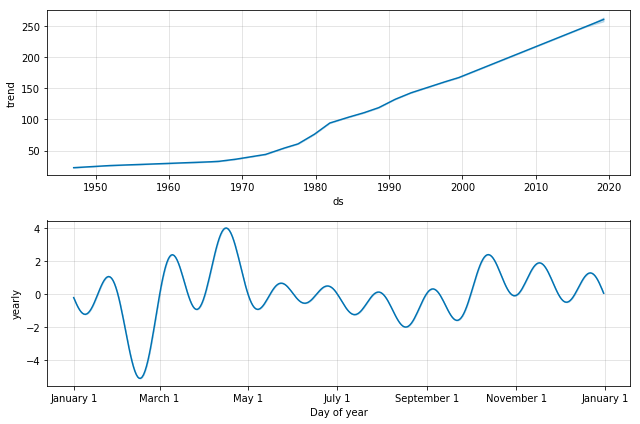

In [15]:
fig=fbpro.plot_components(forecast)

In [16]:
fbpro1=Prophet(seasonality_mode='multiplicative')
fbpro1.fit(train)
future=fbpro1.make_future_dataframe(48,freq='MS')
forecast1=fbpro1.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
testpred=forecast1.iloc[-48:]['yhat']
rmse(testpred,test['y'])

6.916705290134479

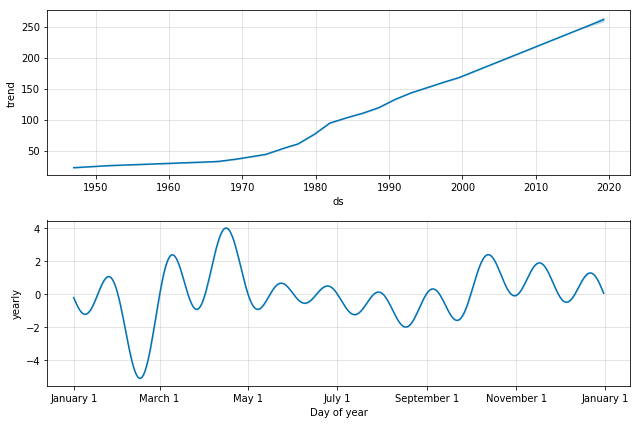

In [18]:
fig=fbpro.plot_components(forecast1)

In [19]:
fbpro=Prophet()
fbpro.fit(data)
future=fbpro.make_future_dataframe(24,freq='MS')
forecast_future=fbpro.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
forecast_future

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1947-01-01,22.339322,20.520927,23.911022,22.339322,22.339322,-0.062102,-0.062102,-0.062102,-0.062102,-0.062102,-0.062102,0.0,0.0,0.0,22.277220
1,1947-02-01,22.400455,20.506402,23.951628,22.400455,22.400455,-0.050911,-0.050911,-0.050911,-0.050911,-0.050911,-0.050911,0.0,0.0,0.0,22.349544
2,1947-03-01,22.455672,20.579272,24.025586,22.455672,22.455672,-0.110220,-0.110220,-0.110220,-0.110220,-0.110220,-0.110220,0.0,0.0,0.0,22.345453
3,1947-04-01,22.516805,20.743551,24.183368,22.516805,22.516805,-0.041777,-0.041777,-0.041777,-0.041777,-0.041777,-0.041777,0.0,0.0,0.0,22.475028
4,1947-05-01,22.575967,20.832819,24.236916,22.575967,22.575967,0.012274,0.012274,0.012274,0.012274,0.012274,0.012274,0.0,0.0,0.0,22.588240
5,1947-06-01,22.637100,20.868127,24.473066,22.637100,22.637100,0.018512,0.018512,0.018512,0.018512,0.018512,0.018512,0.0,0.0,0.0,22.655612
6,1947-07-01,22.696261,21.077010,24.542008,22.696261,22.696261,0.072725,0.072725,0.072725,0.072725,0.072725,0.072725,0.0,0.0,0.0,22.768985
7,1947-08-01,22.757394,21.092863,24.608393,22.757394,22.757394,0.080419,0.080419,0.080419,0.080419,0.080419,0.080419,0.0,0.0,0.0,22.837813
8,1947-09-01,22.818527,21.375007,24.604712,22.818527,22.818527,0.052441,0.052441,0.052441,0.052441,0.052441,0.052441,0.0,0.0,0.0,22.870968
9,1947-10-01,22.877688,21.107677,24.691476,22.877688,22.877688,-0.017691,-0.017691,-0.017691,-0.017691,-0.017691,-0.017691,0.0,0.0,0.0,22.859997


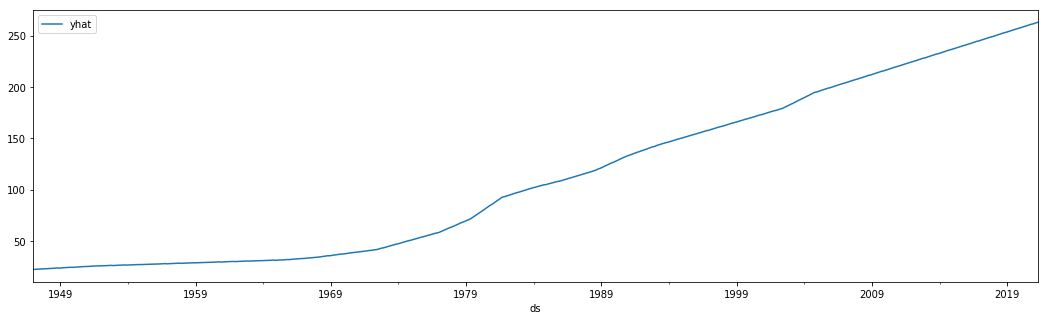

In [21]:
forecast_future.plot(x='ds',y='yhat',figsize=(18,5))

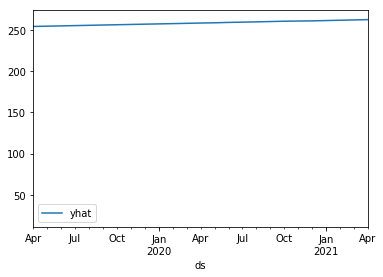

In [23]:
forecast_future.plot(x='ds',y='yhat',xlim=('2019-04-01','2021-04-01'))